# Overfitting
## In this lab, we are going to explore how thoughtfully choosing a model and using test set are important parts of avoiding overfitting. 

We are going to apply these concepts to a classification model. We want to develop a decision boundary, on one side of which we have class A and on the other we have class B.

Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever), and sucks only slightly less than overfitting. At least your model performs consistently bad :)


### First, we are going to generate some synthetic data. To make these concepts visual, we are going to generate this data to be concentric circles. Run the code below to do so. 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from IPython.display import display

# Makin' some data
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

### As our classification algorithm, we are going to use a type of SVM with a radial basis function. This basically works by mapping each point into a higher dimensional space that can be split by the SVM (gross oversimplification). That looks something like this:
![RBFSVM.png](../images/RBFSVM.png)

### We can change the complexity of the decision boundaries applied by the SVM by changing the size of the radial basis function, through the parameter 'gamma'.

Instantiate a list of three SVM classifiers with three different gamma parameters, (.001, 1, and 20).

In [3]:
# Your code here
from sklearn.svm import SVC

gammas = [0.001, 1, 20]
classifiers = [SVC(gamma = i) for i in gammas]
# idk if I have to .fit(X, y) or not
# guess not because I see in the for loop below a .fit being done with these classifiers I made :)

### Now, we are going to plot the boundaries created by each of these classifiers with the points we generated. Run the following code to make three graphs of each SVM classifier.

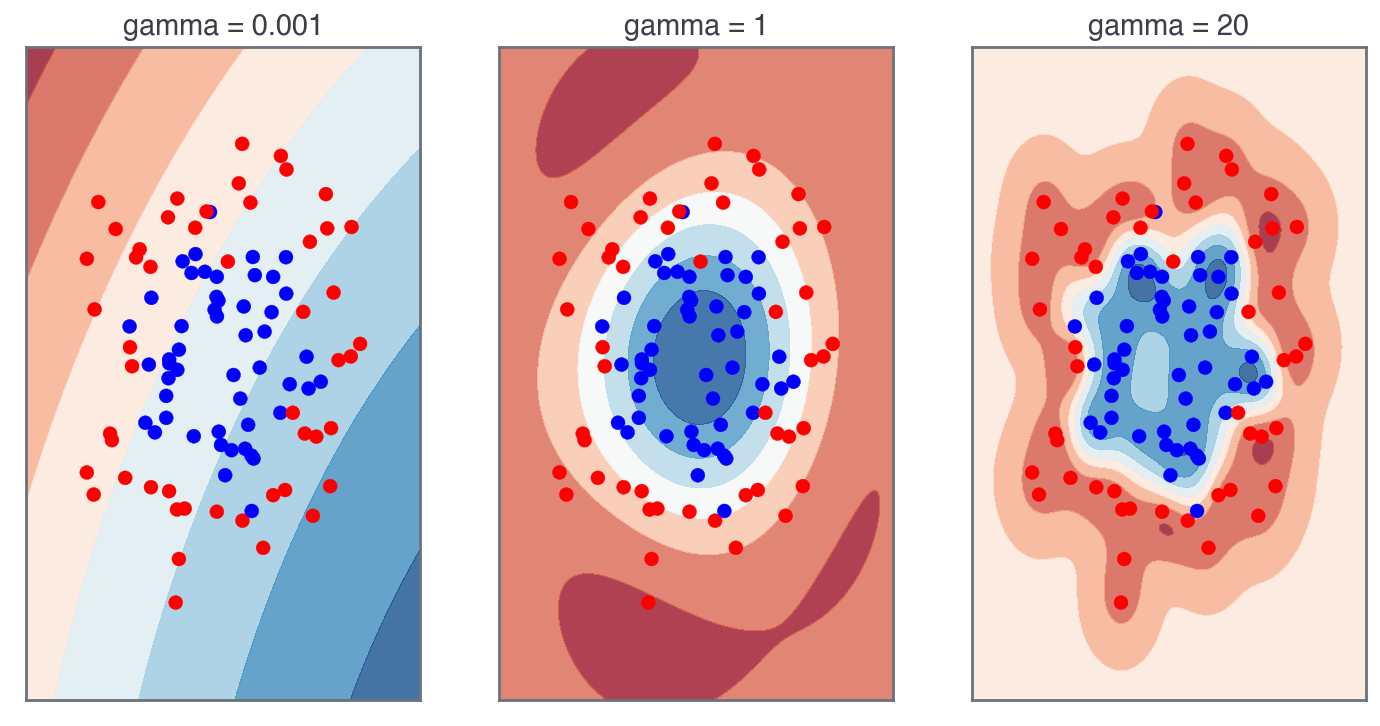

In [7]:
from matplotlib.colors import ListedColormap

figure = plt.figure(figsize=(12, 6))
i = 1
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

names = ['gamma = 0.001', 'gamma = 1', 'gamma = 20']

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers), i)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    i += 1
plt.show()

### Where the contour is red, we will predict red, and same for blue; white means there is a 50/50 chance of either class
Explain what you see in the plots above.

Which gamma do you think fits the data best? 

What would you select as the optimal gamma?

In [ ]:
# Your response here
'''
I see in these plots a contour area, which is the predicted value, and dots, which are the actual data points, I presume.
We can observe that the best fitting gamma is 20. However, I believe that it is too overfitted to the data, as the contours are not
very regular and smooth, like in gamma 1. That means the model is trying very hard to fit as much data points as possible to the areas
in which it thinks they should be.

With gamma 1 we see that the countours are nice and circular and this seems to be the best model overall, as gamma 20 is too overfitted, and
gamma 0.001 is too underfitted.
'''

### Without having used a training and testing set, lets see what our accuracy score would be for, for example, a gamma of .7. Use the .score() method.

In [59]:
# Your code here
print('Accuracy:', SVC(gamma = 0.7).fit(X, y).score(X, y))

Accuracy: 0.93


### Wow thats good accuracy! But is it generalizable? Make a test/train split and see how the model performs on the SVM with the gamma of 20. 

In [131]:
# Your code here
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 18)

# Printing the accuracy
print('Accuracy:', SVC(gamma = 20).fit(X_train, y_train).score(X_test, y_test))
# the accuracy lowers (quite a bit :o), which is expectable, but still not that bad
## other random_states yield different accuracies, some pretty high, higher than gamma 0.7 (with rnd_state = 1 acc is 1.0!!)

Accuracy: 0.8


### Try with some of the other gammas to see how the accuracy score changes after implementing a test/train split. 

In [127]:
# Your code here
models = ['Gamma ' + str(i/2) + ' accuracy: ' + str(SVC(gamma = i/2).fit(X_train, y_train).score(X_test, y_test))
          for i in range(1, 21)]

models
# Doesn't really change much the score, actually, after trying all these gammas, it usually stays in 0.8

['Gamma 0.5 accuracy: 0.75',
 'Gamma 1.0 accuracy: 0.8',
 'Gamma 1.5 accuracy: 0.85',
 'Gamma 2.0 accuracy: 0.8',
 'Gamma 2.5 accuracy: 0.75',
 'Gamma 3.0 accuracy: 0.75',
 'Gamma 3.5 accuracy: 0.7',
 'Gamma 4.0 accuracy: 0.75',
 'Gamma 4.5 accuracy: 0.8',
 'Gamma 5.0 accuracy: 0.8',
 'Gamma 5.5 accuracy: 0.8',
 'Gamma 6.0 accuracy: 0.8',
 'Gamma 6.5 accuracy: 0.8',
 'Gamma 7.0 accuracy: 0.8',
 'Gamma 7.5 accuracy: 0.8',
 'Gamma 8.0 accuracy: 0.8',
 'Gamma 8.5 accuracy: 0.8',
 'Gamma 9.0 accuracy: 0.8',
 'Gamma 9.5 accuracy: 0.8',
 'Gamma 10.0 accuracy: 0.8']

In [124]:
models2 = ['Gamma ' + str(i) + ' accuracy: ' + str(SVC(gamma = i).fit(X_train, y_train).score(X_test, y_test))
           for i in np.arange(0.1, 10, 0.1)]

models2
# Not much variability here as well, till gamma 4.39 the scores kinda change a lot between 0.7, 0.75, 0.8, but after that it's always
# 0.8

['Gamma 0.1 accuracy: 0.5',
 'Gamma 0.2 accuracy: 0.7',
 'Gamma 0.30000000000000004 accuracy: 0.75',
 'Gamma 0.4 accuracy: 0.8',
 'Gamma 0.5 accuracy: 0.75',
 'Gamma 0.6 accuracy: 0.75',
 'Gamma 0.7000000000000001 accuracy: 0.75',
 'Gamma 0.8 accuracy: 0.75',
 'Gamma 0.9 accuracy: 0.75',
 'Gamma 1.0 accuracy: 0.8',
 'Gamma 1.1 accuracy: 0.8',
 'Gamma 1.2000000000000002 accuracy: 0.8',
 'Gamma 1.3000000000000003 accuracy: 0.8',
 'Gamma 1.4000000000000001 accuracy: 0.8',
 'Gamma 1.5000000000000002 accuracy: 0.85',
 'Gamma 1.6 accuracy: 0.8',
 'Gamma 1.7000000000000002 accuracy: 0.8',
 'Gamma 1.8000000000000003 accuracy: 0.8',
 'Gamma 1.9000000000000001 accuracy: 0.8',
 'Gamma 2.0 accuracy: 0.8',
 'Gamma 2.1 accuracy: 0.8',
 'Gamma 2.2 accuracy: 0.8',
 'Gamma 2.3000000000000003 accuracy: 0.75',
 'Gamma 2.4000000000000004 accuracy: 0.75',
 'Gamma 2.5000000000000004 accuracy: 0.75',
 'Gamma 2.6 accuracy: 0.75',
 'Gamma 2.7 accuracy: 0.75',
 'Gamma 2.8000000000000003 accuracy: 0.75',
 'Gamma

In [125]:
# Checking the best gamma with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'gamma': np.arange(0.1, 10, 0.1)}
svc = SVC()
svc_cv = GridSearchCV(svc, param_grid, cv = 5)
svc_cv.fit(X_train, y_train)
svc_cv.best_params_
# seems like gamma 1.1 is the best

{'gamma': 1.1}

### Was your previous model overfitting? If so, how would you try to improve this model to prevent this?

In [ ]:
# Your response here
'''
Looking at the plots above and all these results from all the testing done, we can say that the higher the gamma is, (aka the more
complex the model is) the higher the chance of overfitting.

There's no point in using gamma = 20, a serious overfitting case, when using gamma = 1.1 gives us the same accuracy score and
is probably the most optimal one, according to GridSearchCV.

To improve we can reduce the model's complexity, aka lower the gamma parameter, as advised by GridSearchCV.
'''